# Contents  
1. [Data Extraction (Web Scraping)](#1)     
2. [Data Loading](#2)     
3. [Data Transformation & Cleaning](#3) 
4. [Data Visualization (Tableau)](#4) 

<a id="1"></a>
# 1. Data Extraction (Web Scraping)

In [ ]:
!pip3 install selenium

In [32]:
import csv
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

# Set the path to the Chrome WebDriver
service = Service()
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=service, options=options)

# Open the SinaLite website
driver.get('https://sinalite.com/en_ca/all-products.html')

# Initialize a list to store data
data = []

# Get all product containers
product_containers = driver.find_elements(By.CLASS_NAME, 'product-container')

# Process only the first product container
container = product_containers[0]

# Get the category name
category_name = container.find_element(By.CLASS_NAME, 'category-name').text

# Get all product names and their links under the category
products = container.find_elements(By.CLASS_NAME, 'category-product-name')
product_links = [product.find_element(By.TAG_NAME, 'a').get_attribute('href') for product in products]
product_names = [product.text for product in products]

# Iterate over each product link
for product_name, product_link in zip(product_names, product_links):
    # Go to the product page
    driver.get(product_link)
    time.sleep(2)  # Wait for the page to load

    # Get the number of reviews
    try:
        reviews_element = driver.find_element(By.XPATH, '//a[contains(@aria-label, "reviews")]')
        num_reviews = reviews_element.text.split()[0]
    except:
        num_reviews = 'No reviews'


    # Get all rows in the table
    table_rows = driver.find_elements(By.XPATH, '//div[@id="details"]/table/tbody/tr')
    table_data = {}
    for row in table_rows:
        cells = row.find_elements(By.TAG_NAME, 'td')
        if len(cells) >= 2:
            property_title = cells[0].text
            property_value = cells[1].text
            table_data[property_title] = property_value

    # Append category name, product name, number of reviews, average rating, and table data to the data list
    data.append({
        'Category Name': category_name,
        'Product Name': product_name,
        'Number of Reviews': num_reviews,
        'Average Rating': avg_rating,
        'Paper Type': table_data.get('Paper Type', ''),
        'Coating': table_data.get('Coating', ''),
        'Color': table_data.get('Color', ''),
        'Quantities': table_data.get('Quantities', ''),
        'Sizes': table_data.get('Sizes', ''),
        'Finishing': table_data.get('Finishing', ''),
        'File Type': table_data.get('File Type', '')
    })

    # Get the average rating
    try:
        # Click on the 'Reviews' tab to switch to the reviews section
        reviews_tab = driver.find_element(By.XPATH, "//a[@data-stab-name='reviews']")
        reviews_tab.click()

        avg_rating_element = driver.find_element(By.CLASS_NAME, 'avg-score')
        avg_rating = avg_rating_element.text
    except:
        avg_rating = 'No rating'

# Save the data to a CSV file
with open('sinalite_products_reviews.csv', mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=['Category Name', 'Product Name', 'Number of Reviews', 'Average Rating', 'Paper Type', 'Coating', 'Color', 'Quantities', 'Sizes', 'Finishing', 'File Type'])
    writer.writeheader()
    writer.writerows(data)

# Quit the WebDriver
driver.quit()


<a id="2"></a>
# 2. Data Loading

In [42]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('sinalite_products_reviews.csv')

<a id="3"></a>
# 3. Data Transformation & Cleaning

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('sinalite_products_reviews.csv')

# Display the number of rows before cleaning
print("Number of rows before cleaning:", len(df))

# Drop rows with any null values
df_cleaned = df.dropna()

# Display the number of rows after cleaning
print("Number of rows after cleaning:", len(df_cleaned))

# Display the first few rows of the cleaned DataFrame
print("\nFirst few rows of the cleaned DataFrame:")
print(df_cleaned.head())

# Perform EDA on the cleaned DataFrame
# Check for missing values
print("\nMissing values in the cleaned DataFrame:")
print(df_cleaned.isnull().sum())

# Check the data types of each column
print("\nData types in the cleaned DataFrame:")
print(df_cleaned.dtypes)

# Get summary statistics for numerical columns
print("\nSummary statistics for the cleaned DataFrame:")
print(df_cleaned.describe())

df_cleaned.to_csv("cleaned.csv")


Number of rows before cleaning: 23
Number of rows after cleaning: 14

First few rows of the cleaned DataFrame:
    Category Name             Product Name  Number of Reviews  Average Rating  \
0  Business Cards  14pt (Profit Maximizer)                329             4.5   
1  Business Cards      14pt + Matte Finish                276             4.8   
2  Business Cards      16pt + Matte Finish                385             4.8   
3  Business Cards   14pt + UV (High Gloss)                288             4.8   
4  Business Cards   16pt + UV (High Gloss)                328             4.9   

                       Paper Type                Coating  \
0      14PT Gloss (95 Bright C2S)             No Coating   
1        95 Bright 14pt C2S Stock           Matte Finish   
2  95 Bright 16pt Gloss C2S Stock           Matte Finish   
3        95 Bright 14pt C2S Stock  High Gloss UV Coating   
4  95 Bright 16pt Gloss C2S Stock  High Gloss UV Coating   

                                         

<a id="4"></a>
# 4. Data Visualization (Tableau)

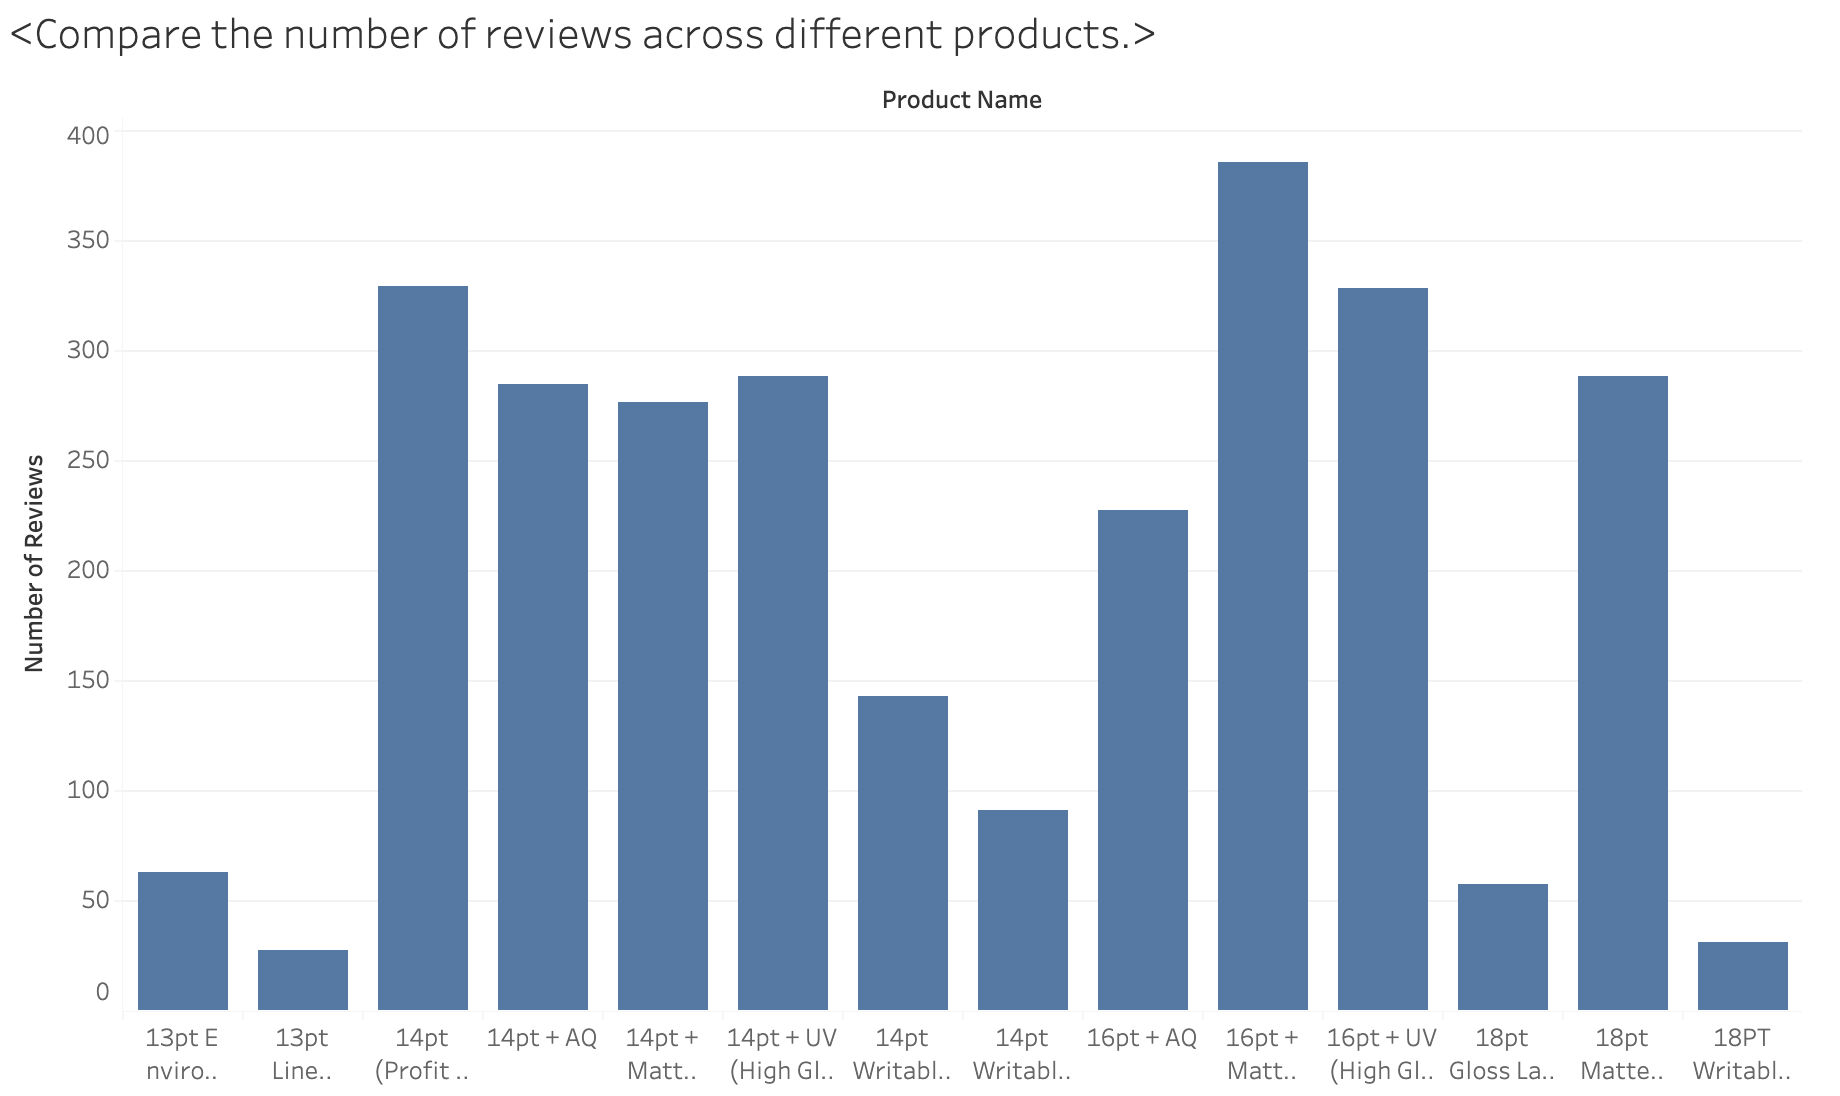

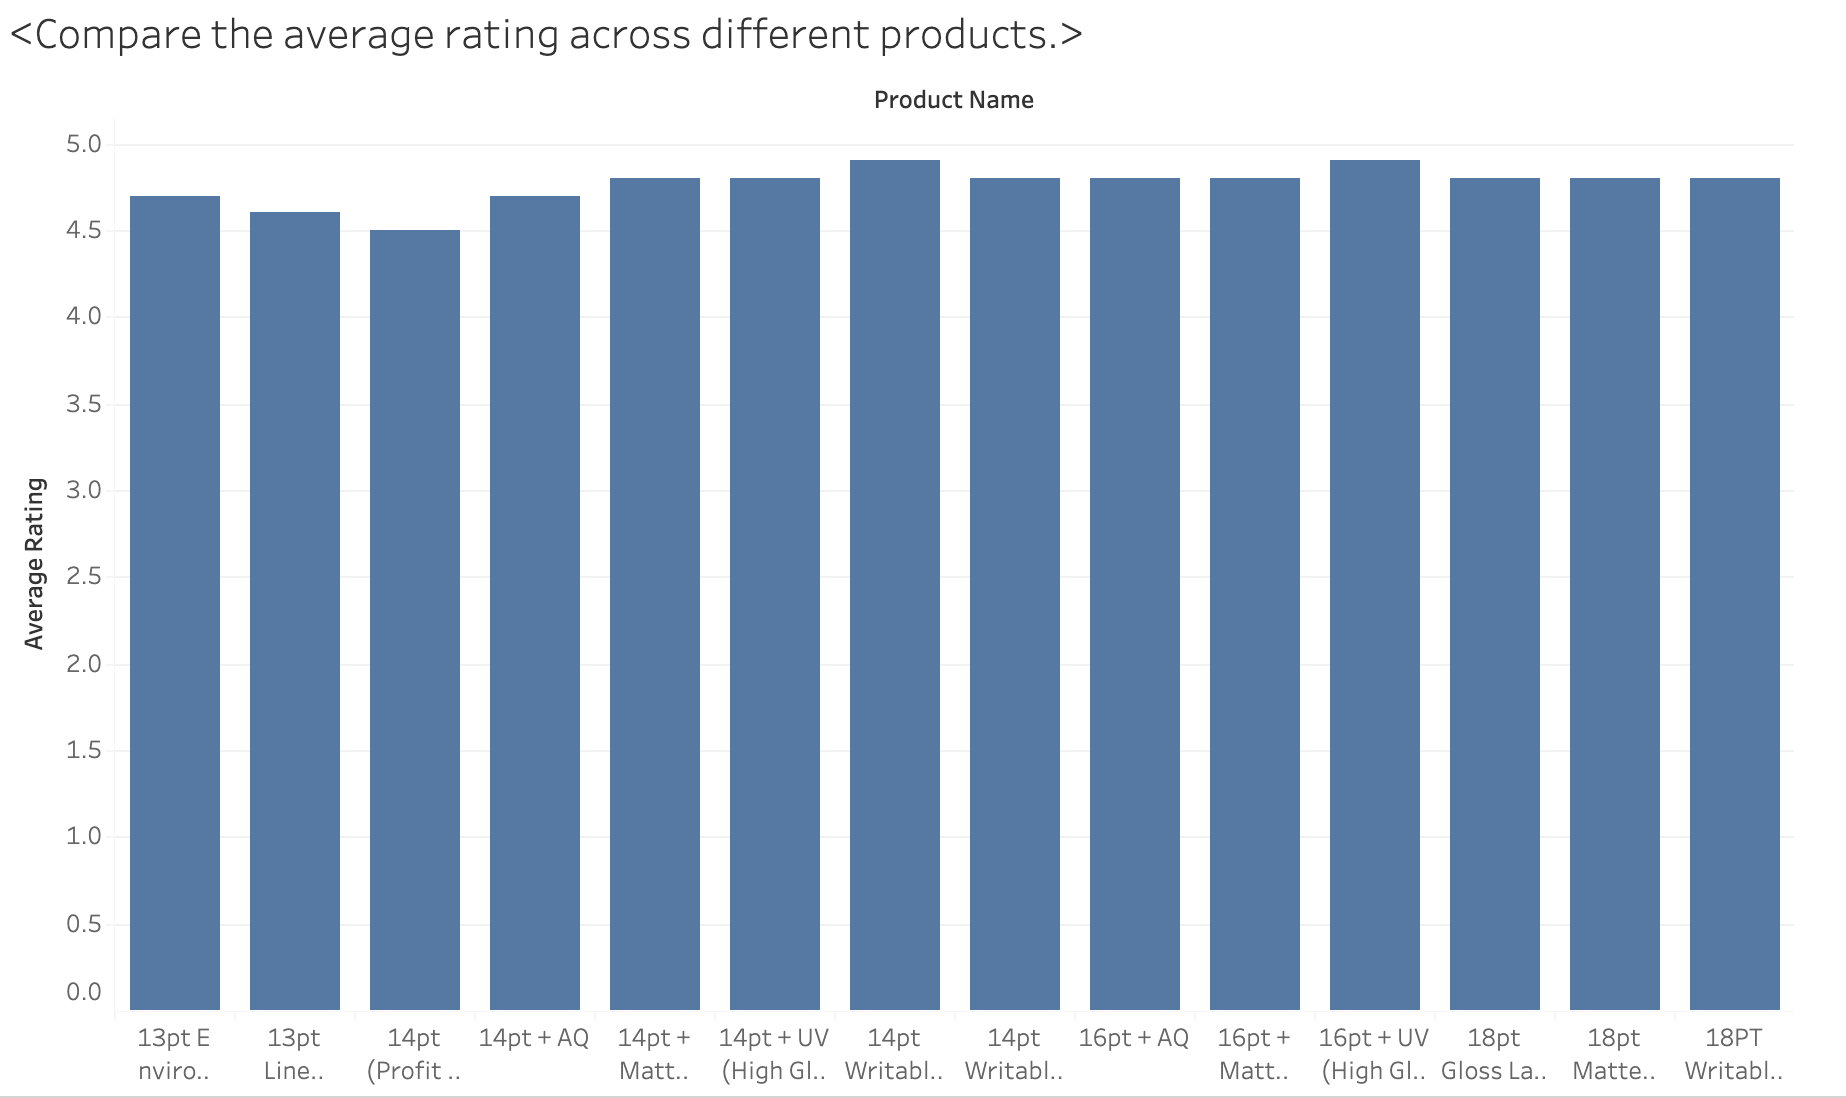